In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\91931\Desktop\Data Science\Python\drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape

(200, 6)

In [4]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [12]:
a =['Sex', 'BP', 'Cholesterol', 'Drug']
b =['Age','Na_to_K']

In [ ]:
#Univariate Analysis

M    104
F     96
Name: Sex, dtype: int64


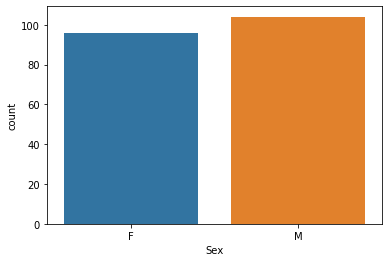

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


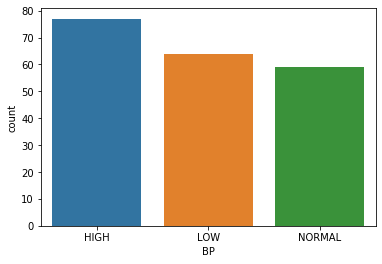

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


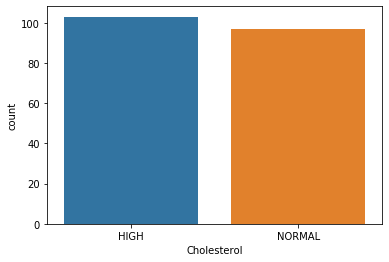

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


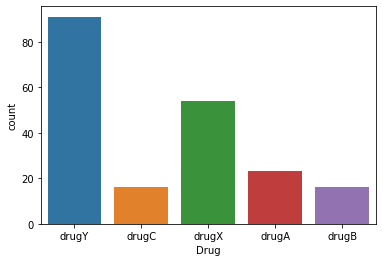

In [15]:
for i in a:
    print(df[i].value_counts())
    sns.countplot(x=i, data =df)
    plt.show()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64
0.03030835703000607


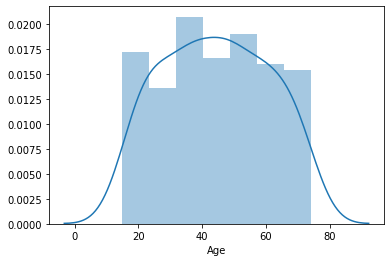

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64
1.039341186028881


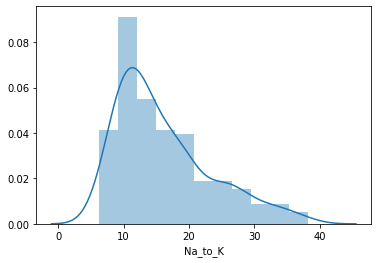

In [16]:
for i in b:
    print(df[i].describe())
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

In [ ]:
#bivariate Analysis

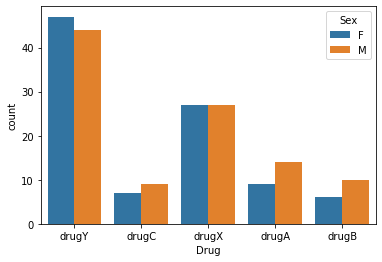

Drug  drugA  drugB  drugC  drugX  drugY  All
Sex                                         
F         9      6      7     27     47   96
M        14     10      9     27     44  104
All      23     16     16     54     91  200


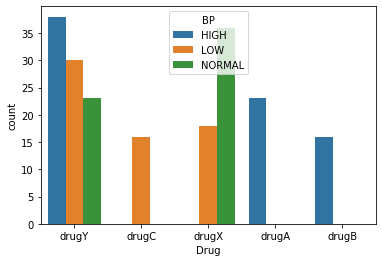

Drug    drugA  drugB  drugC  drugX  drugY  All
BP                                            
HIGH       23     16      0      0     38   77
LOW         0      0     16     18     30   64
NORMAL      0      0      0     36     23   59
All        23     16     16     54     91  200


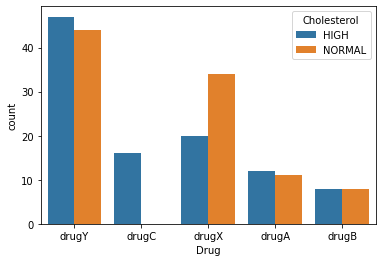

Drug         drugA  drugB  drugC  drugX  drugY  All
Cholesterol                                        
HIGH            12      8     16     20     47  103
NORMAL          11      8      0     34     44   97
All             23     16     16     54     91  200


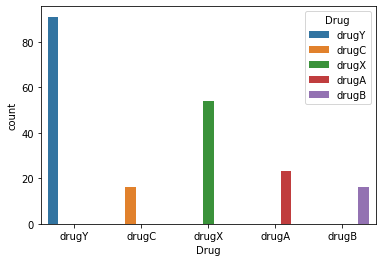

Drug   drugA  drugB  drugC  drugX  drugY  All
Drug                                         
drugA     23      0      0      0      0   23
drugB      0     16      0      0      0   16
drugC      0      0     16      0      0   16
drugX      0      0      0     54      0   54
drugY      0      0      0      0     91   91
All       23     16     16     54     91  200


In [22]:
for i in a:
    new=pd.crosstab(df[i], df["Drug"], margins = True)
    sns.countplot(x= "Drug",hue =i, data =df)
    plt.show()
    print(new)

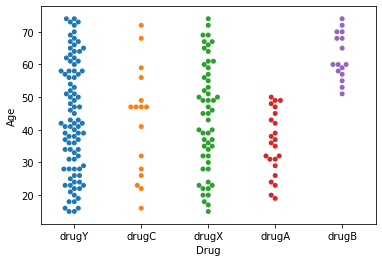

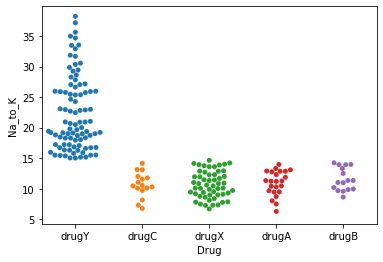

In [23]:
for i in b:
    sns.swarmplot(x ="Drug", y =i, data =df)
    plt.show()

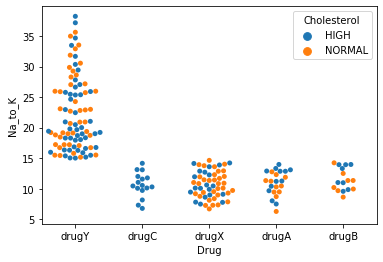

In [26]:
sns.swarmplot(x="Drug",y=i,hue="Cholesterol",data =df)
plt.show()

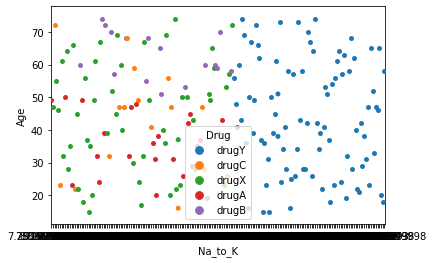

In [33]:
sns.swarmplot(x="Na_to_K", y="Age", hue="Drug", data=df)
plt.show()

In [ ]:
# Machine Learning 

In [35]:
x= df.drop('Drug', axis=1)
y=df['Drug']

In [39]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [41]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()

In [58]:
x["Sex"]=l1.fit_transform(df["Sex"])
x["BP"]=l2.fit_transform(df["BP"])
x["Cholesterol"]=l3.fit_transform(df["Cholesterol"])

In [59]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [60]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, train_size=0.8)

In [61]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(160, 5)
(160,)
(40, 5)
(40,)


In [62]:
from sklearn.tree import DecisionTreeClassifier
algo=DecisionTreeClassifier(criterion ="entropy")
algo.fit(xtrain,ytrain)
ypred =algo.predict(xtest)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(ytest, ypred))
print(accuracy_score(ytest, ypred))

[[ 2  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 22]]
1.0


[Text(348.75, 342.46799999999996, 'X[4] <= 14.829\nentropy = 1.974\nsamples = 160\nvalue = [20, 12, 12, 46, 70]'),
 Text(279.0, 266.364, 'X[2] <= 0.5\nentropy = 1.752\nsamples = 90\nvalue = [20, 12, 12, 46, 0]'),
 Text(139.5, 190.26, 'X[0] <= 52.5\nentropy = 0.954\nsamples = 32\nvalue = [20, 12, 0, 0, 0]'),
 Text(69.75, 114.156, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(209.25, 114.156, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(418.5, 190.26, 'X[2] <= 1.5\nentropy = 0.736\nsamples = 58\nvalue = [0, 0, 12, 46, 0]'),
 Text(348.75, 114.156, 'X[3] <= 0.5\nentropy = 0.985\nsamples = 28\nvalue = [0, 0, 12, 16, 0]'),
 Text(279.0, 38.051999999999964, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(418.5, 38.051999999999964, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]'),
 Text(488.25, 114.156, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 0, 30, 0]'),
 Text(418.5, 266.364, 'entropy = 0.0\nsamples = 70\nvalue = [0, 0, 0, 0, 70

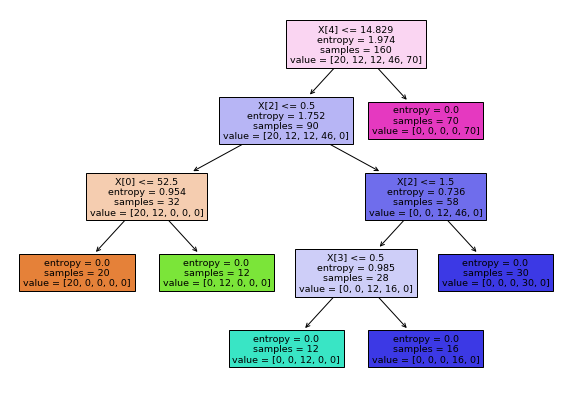

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(algo, filled = True)

In [57]:
import joblib
joblib.dump(algo,r"C:\Users\91931\Desktop\Data Science\DecisionTree.pkl")

['C:\\Users\\91931\\Desktop\\Data Science\\DecisionTree.pkl']